In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import statsmodels as sm
# import scikit-learn as sk;
import seaborn as sns
import pandas as pd
import pycaret as pct
import missingno as msno
from pycaret.classification import *
%matplotlib inline

In [16]:
# Encapsular toda a parte de seleção de features em um pipeline do SKLearn

df = pd.read_csv('../dataset/Bias_correction_ucl.csv', sep=',')

df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.000000,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.000000,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.000000,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,2017-08-30,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000,0.000796,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaT,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [17]:
print(df.index.unique())
df.dtypes

RangeIndex(start=0, stop=7752, step=1)


station                    float64
Date                datetime64[ns]
Present_Tmax               float64
Present_Tmin               float64
LDAPS_RHmin                float64
LDAPS_RHmax                float64
LDAPS_Tmax_lapse           float64
LDAPS_Tmin_lapse           float64
LDAPS_WS                   float64
LDAPS_LH                   float64
LDAPS_CC1                  float64
LDAPS_CC2                  float64
LDAPS_CC3                  float64
LDAPS_CC4                  float64
LDAPS_PPT1                 float64
LDAPS_PPT2                 float64
LDAPS_PPT3                 float64
LDAPS_PPT4                 float64
lat                        float64
lon                        float64
DEM                        float64
Slope                      float64
Solar radiation            float64
Next_Tmax                  float64
Next_Tmin                  float64
dtype: object

Tem-se a coluna **station** contem dados discretos , a coluna **Date** com dados de data e as demais 22 colunas apresentam dados contínuos

### Distribuição de nulos

In [4]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [18]:
#Remoção de linhas com data nula
df = df[df['Date'].notna()]
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,1.616969e-01,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,1.594441e-01,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,2.040915e-01,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,1.611574e-01,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,1.788925e-01,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,2017-08-30,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,0.030169,0.000000e+00,0.004380,0.0,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.0,2017-08-30,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,5.850000e-07,0.017678,0.0,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


Como o dataset apresenta uma contagem de 2 linhas da columna **Date** contendo valores nulos estas foram removidas conseiderando o numero irrelevante. 

<AxesSubplot:>

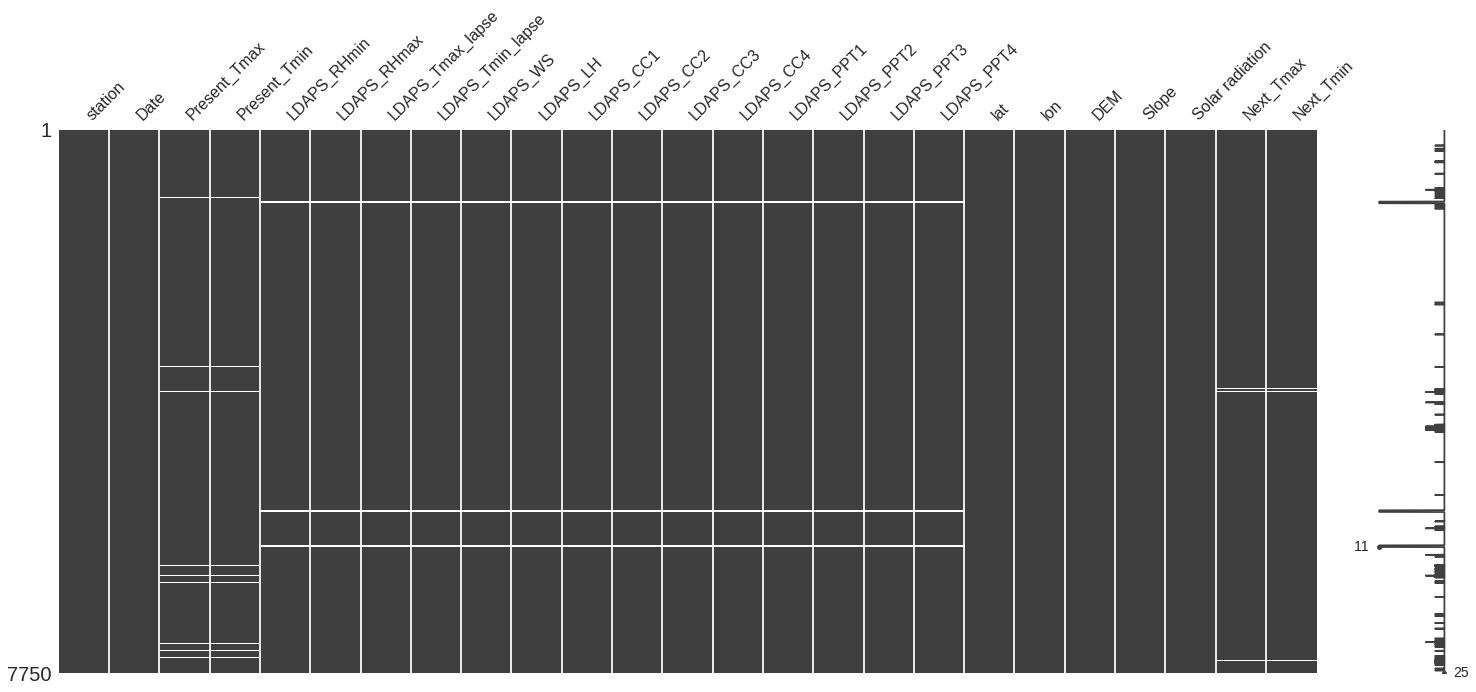

In [129]:
# msno.matrix(df.set_index(pd.period_range('2013-06-30', '2015-06-30', freq='M')), freq='BQ')

msno.matrix(df)

As variáveis criadas utilizando **LDAPS** apresentam uma mesma distribuição de nulos dentro do dataset. As variáveis **station, lat, lon, DEM, Slope, Solar radiation** aparentam estar totalmente populadas enquanto as variáveis **Present_Tmax, Present_Tmin** apresentam uma distribuição esparsa dentre as linhas do dataset.

<AxesSubplot:>

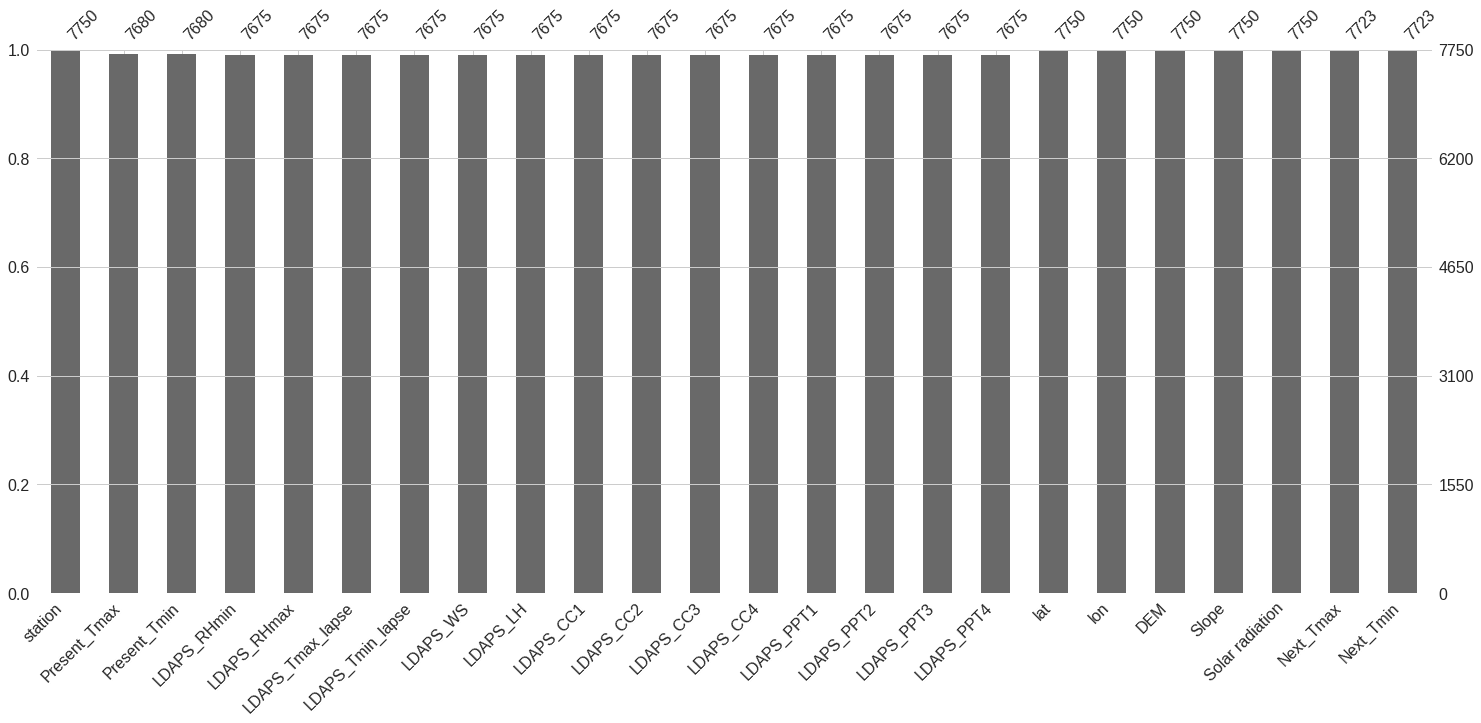

In [94]:
msno.bar(df)

<AxesSubplot:>

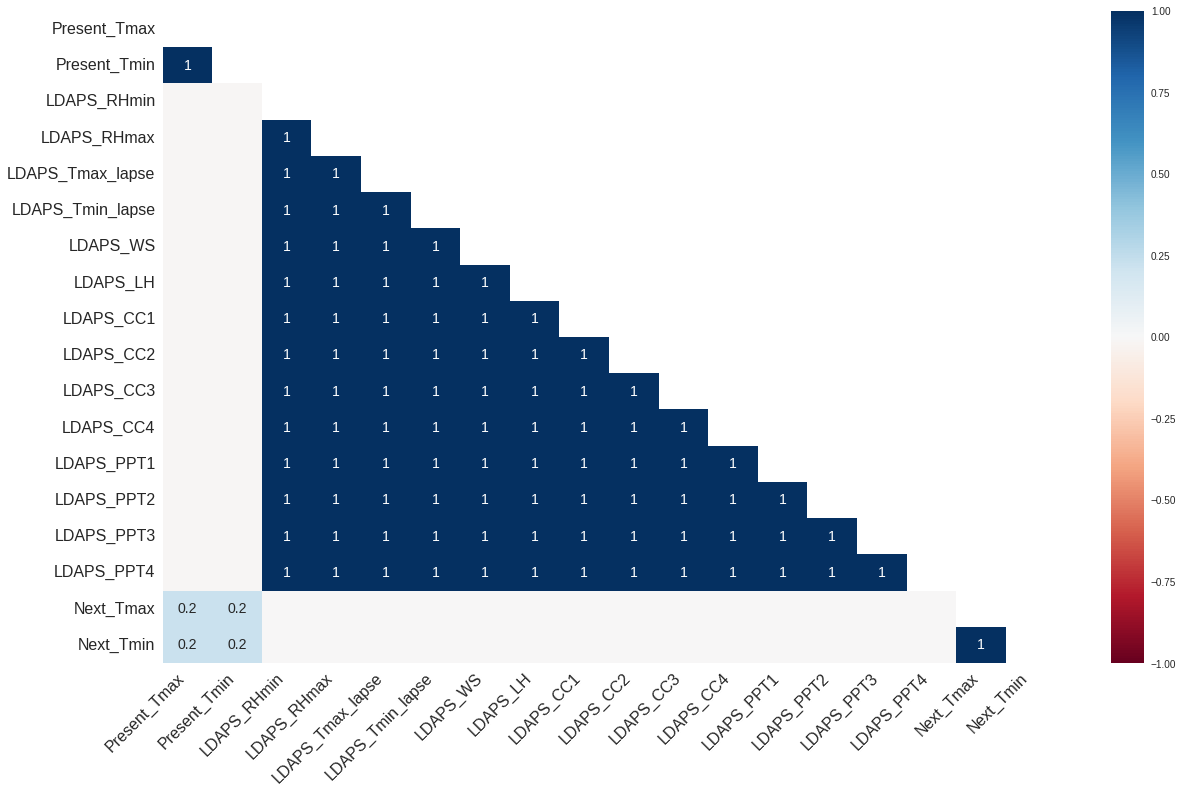

In [95]:
msno.heatmap(df)

Explicar correlação entre Next_Tmax e Present_Tmax, e porque as nulas da target forma excluídas

In [19]:
indexes = df[df['Next_Tmax'].isna()].index

df[df['Next_Tmax'].isna()]

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
831,7.0,2013-08-02,29.6,25.8,76.202255,94.058517,28.842727,26.442801,7.980686,87.715882,0.442766,0.342353,0.333352,0.227664,0.086539,0.000000,0.000000,0.000000,37.5776,126.838,12.3700,0.0985,5357.705566,NaN,NaN
856,7.0,2013-08-03,NaN,NaN,69.476059,93.672600,30.491629,25.081388,6.282423,124.191446,0.473034,0.322410,0.071169,0.173785,0.004247,0.000000,0.000000,0.000000,37.5776,126.838,12.3700,0.0985,5332.515625,NaN,NaN
1073,24.0,2013-08-11,34.2,25.1,50.618851,89.166397,33.414349,27.475249,6.084058,48.521008,0.254070,0.152827,0.019523,0.013130,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.2223,5109.454102,NaN,NaN
2465,16.0,2014-08-05,28.8,23.1,71.442566,90.695419,26.273760,23.419080,3.787889,41.739802,0.260468,0.641655,0.687770,0.751662,0.000000,0.010050,0.681801,0.000000,37.4697,126.995,82.2912,2.2579,5269.604980,NaN,NaN
3696,22.0,2015-07-23,30.4,23.4,81.568771,93.973579,26.724457,24.984435,5.779299,58.456456,0.798225,0.739302,0.620072,0.659948,0.794114,0.711069,0.016985,0.064332,37.5102,127.086,21.9668,0.1332,5578.788086,NaN,NaN
3714,15.0,2015-07-24,24.6,22.4,83.265244,94.153442,26.738321,24.585545,8.048991,43.391457,0.817756,0.666070,0.763967,0.583959,0.345704,0.803824,0.190226,0.001864,37.5507,126.937,30.0464,0.8552,5578.187500,NaN,NaN
3739,15.0,2015-07-25,NaN,NaN,68.156593,93.874550,28.502294,24.270829,5.819343,35.236471,0.863410,0.689771,0.304014,0.064232,0.228036,1.128825,0.000000,0.000000,37.5507,126.937,30.0464,0.8552,5558.664551,NaN,NaN
3886,12.0,2015-07-31,NaN,NaN,64.559479,86.083702,29.628166,25.745189,8.629767,26.564901,0.783111,0.781624,0.311202,0.235075,0.003733,0.020635,0.001050,0.000000,37.5507,126.988,132.1180,0.5931,5477.556152,NaN,NaN
4205,6.0,2015-08-13,30.8,23.9,35.218002,82.458534,32.241880,23.018172,6.547084,63.516243,0.101724,0.068263,0.016206,0.036830,0.000000,0.000000,0.000000,0.000000,37.5102,127.042,54.6384,0.1457,5069.704102,NaN,NaN
4230,6.0,2015-08-14,NaN,NaN,43.412582,84.317780,32.028639,24.274533,5.880758,54.278856,0.140189,0.076580,0.180294,0.130072,0.000000,0.000000,0.007733,0.000000,37.5102,127.042,54.6384,0.1457,5037.928223,NaN,NaN


Por ser um dado temporal e ser trabalhado em temperaturas a variação não deve ser muita, logo pode-se inferir o valor da target que está nulo por interpolação das médias analisando o estado anterior e posterior. Abaixo temos uma das linhas em que ocorreu a interpolação (**831**) e os estados anteriores e posteriores 


In [20]:
df['Next_Tmax'] = df['Next_Tmax'].interpolate(method='linear')
df['Present_Tmax'] = df['Present_Tmax'].interpolate(method='linear')
df['Present_Tmin'] = df['Present_Tmin'].interpolate(method='linear')
df.iloc[[830,831,832]]

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
830,6.0,2013-08-02,29.4,25.7,67.495590,87.607582,29.662294,26.519021,8.175170,34.380867,0.382843,0.386578,0.394699,0.179816,0.000000,0.0,0.0,0.0,37.5102,127.042,54.6384,0.1457,5379.994141,33.0,26.9
831,7.0,2013-08-02,29.6,25.8,76.202255,94.058517,28.842727,26.442801,7.980686,87.715882,0.442766,0.342353,0.333352,0.227664,0.086539,0.0,0.0,0.0,37.5776,126.838,12.3700,0.0985,5357.705566,32.9,NaN
832,8.0,2013-08-02,30.4,26.4,67.476746,92.119804,29.049472,26.312093,8.362006,30.248168,0.355978,0.318236,0.376368,0.240596,0.000000,0.0,0.0,0.0,37.4697,126.910,52.5180,1.5629,5365.518555,32.8,26.8


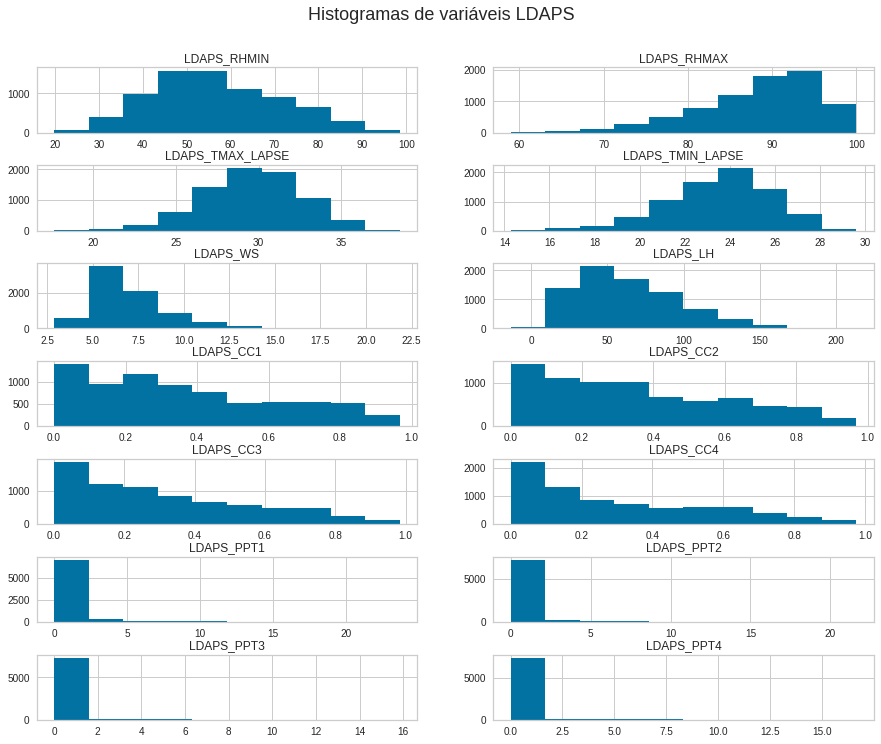

In [21]:
# Pegando apenas as features produzidas pelo LDAPS
ldaps_cols = ['LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4']
fig, axs = plt.subplots(nrows=7, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Histogramas de variáveis LDAPS", fontsize=18, y=0.95)


for ticker, ax in zip(ldaps_cols, axs.ravel()):
    df[ticker].hist(ax=ax)
    ax.set_title(ticker.upper())
    ax.set_xlabel("")

plt.show()

In [22]:
df[ldaps_cols] = df[ldaps_cols].apply(pd.to_numeric, errors='coerce')
df = df.fillna(df.median())
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

Tratamento de nulos das colunas LDAPS utilizando mediana

In [255]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000
mean,13.000000,29.770665,23.229239,56.742104,88.390831,29.614712,23.515389,7.091188,62.440791,0.368230,0.355625,0.317819,0.298451,0.583360,0.477644,0.273535,0.264721,37.544720,126.991400,61.854944,1.256692,5341.549330,30.273910,22.933419
std,7.211568,2.966484,2.406437,14.586073,7.150356,2.928370,2.331006,2.167185,33.520913,0.261148,0.256752,0.249099,0.253104,1.919557,1.738607,1.143042,1.186283,0.050335,0.079406,54.256953,1.369833,428.996445,3.124258,2.478871
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,46.048225,84.318649,27.693733,22.115268,5.686498,37.547426,0.148339,0.142424,0.103113,0.082777,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,0.312421,0.262555,0.227664,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.032715,93.703491,31.682567,25.133460,8.005363,83.891182,0.571665,0.554910,0.493971,0.497218,0.049102,0.016720,0.007199,0.000000,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178200,5992.895996,38.900000,29.800000


## Análise exploratória

### Análise de outliers

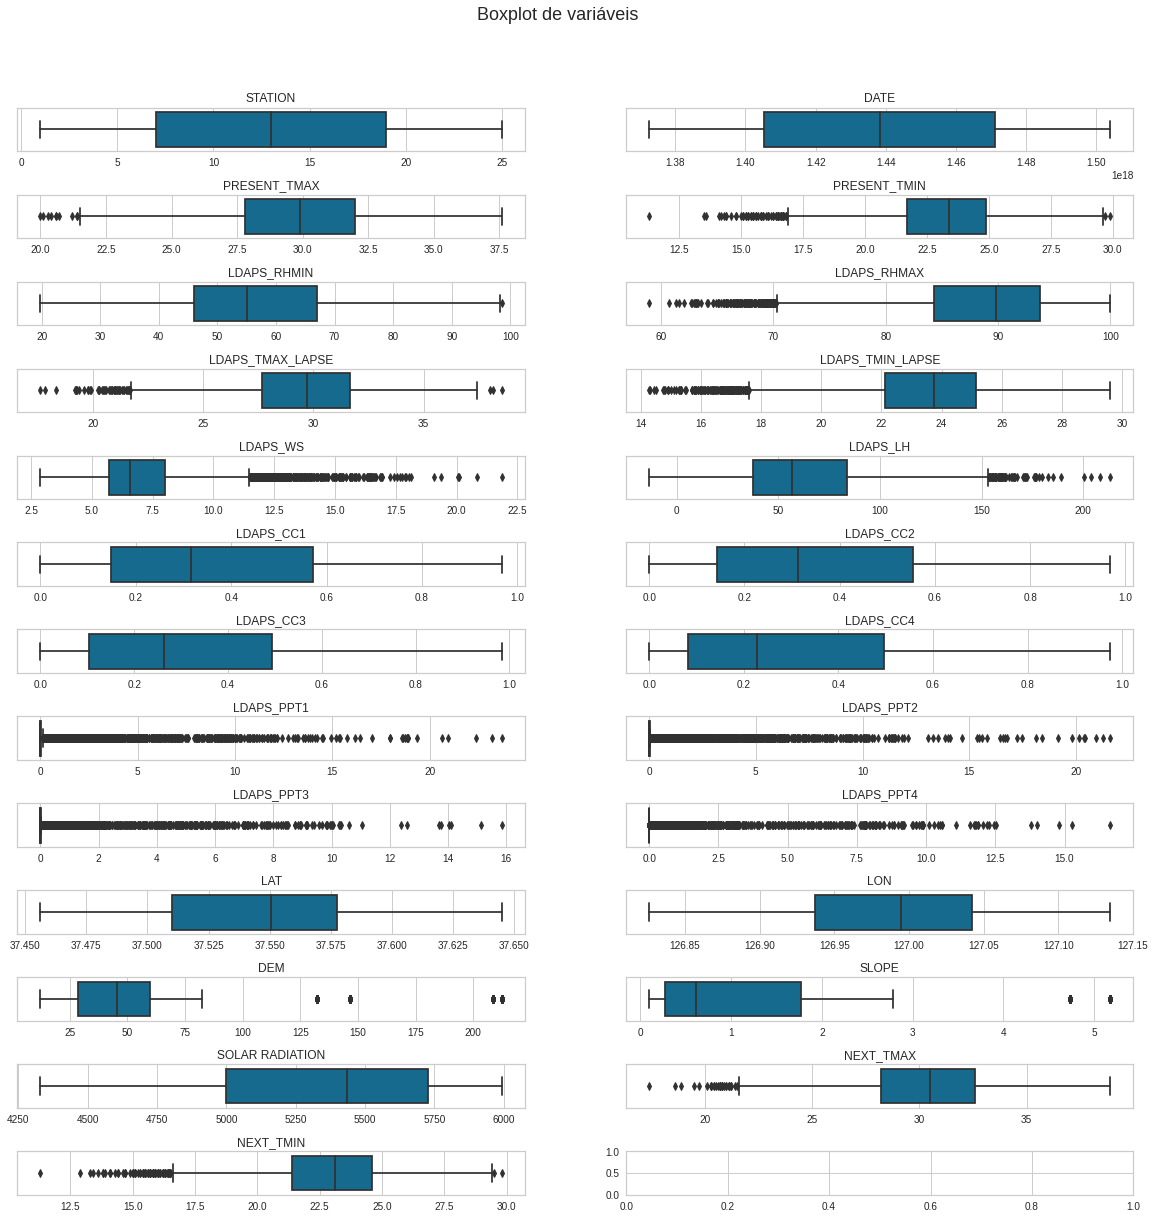

In [171]:
cols = df.columns
fig, axs = plt.subplots(nrows=13, ncols=2, figsize=(20, 20))
plt.subplots_adjust(hspace=1)
fig.suptitle("Boxplot de variáveis", fontsize=18, y=0.95)


for ticker, ax in zip(cols, axs.ravel()):
    sns.boxplot(x = df[ticker], ax=ax)
    ax.set_title(ticker.upper())
    ax.set_xlabel("")

plt.show()

Optei por remover as variáveis que apresentavam um grande número de outliers e que não apresentavam qualquer correlação com a variável resposta, nesse caso foram as variáveis **LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3 e LDAPS_PPT4**

In [23]:
df.drop(['LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4'], inplace=True, axis=1)
df.to_csv('../dataset/Bias_correction_ucl_treated.csv', sep=',', index=False)

Outra possibilidade de ferramenta para análise de outliers é utilizando o DBScan que realiza uma clusterização de valores principais e identifica os possíveis outliers fora destes clusters. Por conta do tempo limitado optei por realizar uma abordagem mais direta e simples.

#### Tratamento de Outliers

Uma possibilidade de tratamento de outliers é o uso de np.log1p, tendo em vista que ele soma +1 no valor e aplica o log nas variáveis, garantindo que não tem um log de 0 e transformando o a distribuição para uma gaussiana que pode ser utilizada em um modelo linear. Abaixo são apresentados dois plots para demonstrar a diferença dos plots.

<AxesSubplot:xlabel='LDAPS_WS', ylabel='Count'>

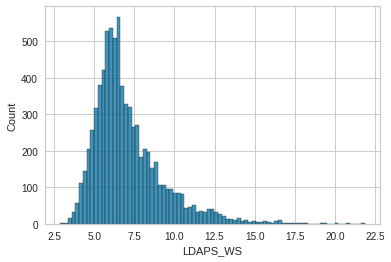

In [181]:
sns.histplot(df['LDAPS_WS'])

<AxesSubplot:xlabel='LDAPS_WS', ylabel='Count'>

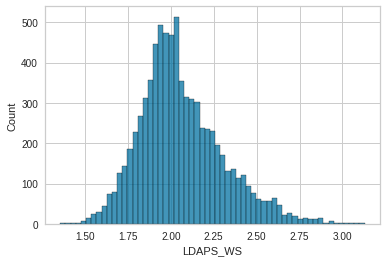

In [185]:
sns.histplot(np.log1p(df['LDAPS_WS']))

Outra forma de tratar outliers é "chapando" (arredondando) os valores para os limites superior e inferior (máximo e mínimo das barras) do box utilizando o método Tukey para identifica-los

In [1]:
df.boxplot

NameError: name 'df' is not defined

<AxesSubplot:xlabel='LDAPS_LH', ylabel='Count'>

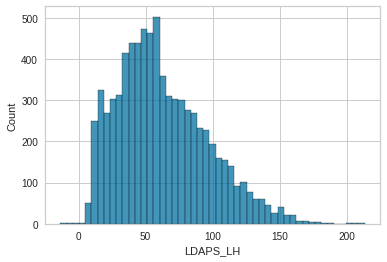

In [197]:
sns.histplot(df['LDAPS_LH'])

<AxesSubplot:xlabel='LDAPS_WS', ylabel='Count'>

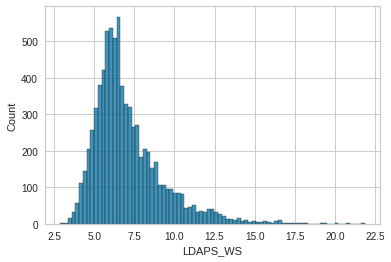

In [198]:
q1 = df["LDAPS_LH"].quantile(0.25)
q3 = df["LDAPS_LH"].quantile(0.75)

iqr = q3 - q1

limite_inferior = q1 - (1.5 * iqr)
limite_superior = q3 + (1.5 * iqr)

df[df["LDAPS_LH"] <= limite_inferior]["LDAPS_LH"] = limite_inferior
df[df["LDAPS_LH"] >= limite_superior]["LDAPS_LH"] = limite_superior

<AxesSubplot:xlabel='LDAPS_WS', ylabel='Density'>

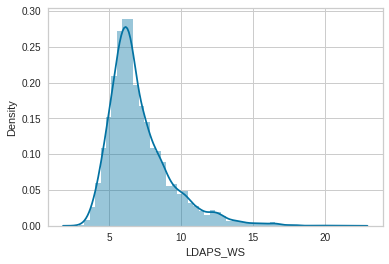

In [199]:
sns.distplot(df['LDAPS_WS'])

### Análise em função do tempo

array(['2013-06', '2013-07', '2013-08', '2014-06', '2014-07', '2014-08',
       '2015-06', '2015-07', '2015-08', '2016-06', '2016-07', '2016-08',
       '2017-06', '2017-07', '2017-08'], dtype=object)

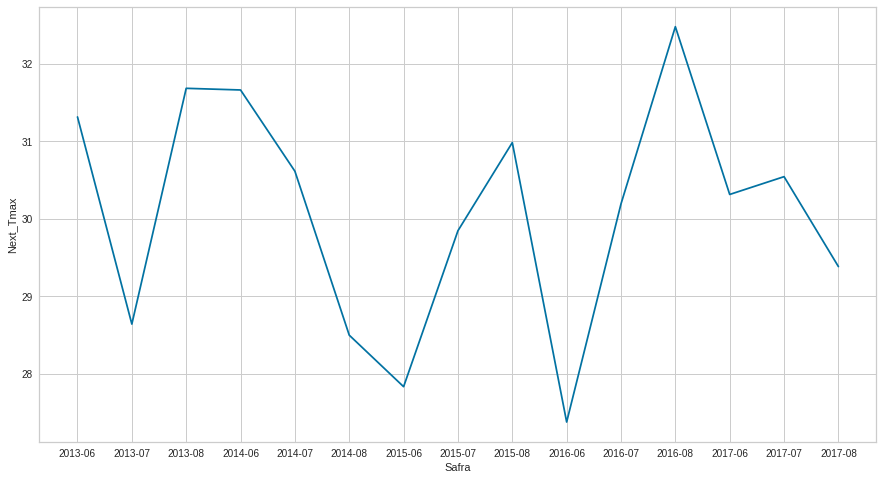

In [262]:
# Análise de variação da target em função do tempo
plt.figure(figsize=(15, 8))
df['Safra'] = df['Date'].dt.strftime('%Y-%m')
sns.lineplot(data=df.groupby(['Safra']).mean(), y = 'Next_Tmax', x= 'Safra')
ax.set(xticks=df['Safra'].unique())
plt.xticks(np.unique(df["Safra"]))
df['Safra'].unique()

([<matplotlib.axis.XTick at 0x7f1d6ffd1160>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

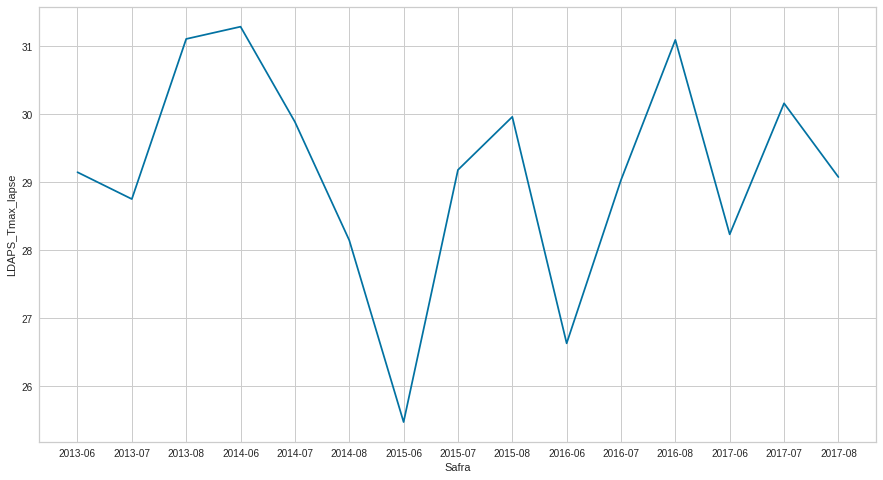

In [271]:
# Análise de variação da target em função do tempo
plt.figure(figsize=(15, 8))
sns.lineplot(data=df.groupby(['Safra']).mean(), y = 'LDAPS_Tmax_lapse', x= 'Safra')
# ax.set(xticks=df['Safra'].unique())
plt.xticks(np.unique(df["Safra"]))

### Análise de correlação de variáveis utilizando Pearson

<AxesSubplot:>

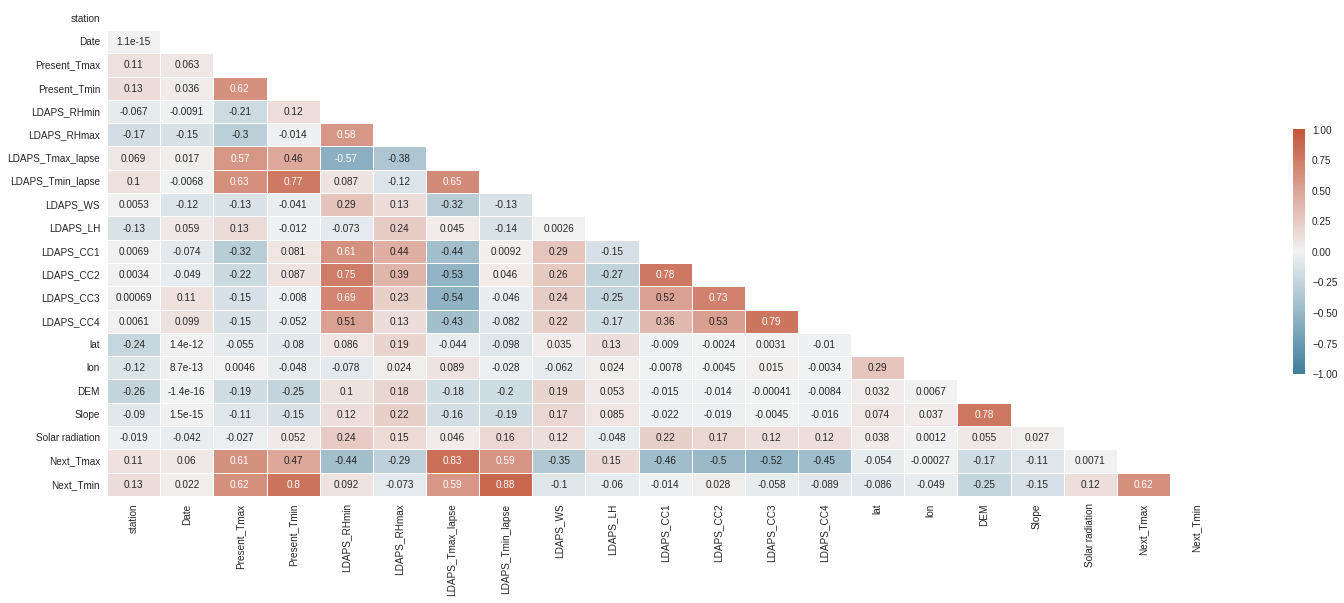

In [203]:
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(25, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            linewidths=.5, annot=True, cbar_kws={"shrink": .5})


Por uma questão exploratória, escolhi variáveis que apresentavam correlação com a resposta superior 0.4 (positiva e negativamente), um valor mais conservador a ser utilizado seria de 0.6, porém como o intuito é um teste inicial resolvi manter um valor mais baixo. 

<AxesSubplot:>

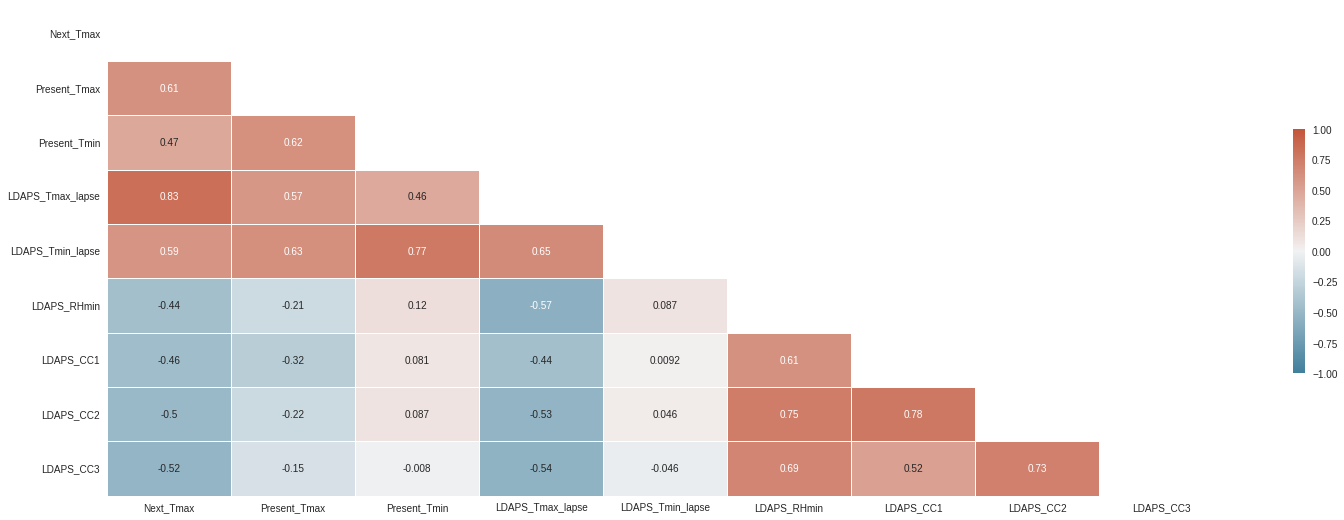

In [267]:

corr_vars = ['Next_Tmax', 'Present_Tmax', 'Present_Tmin', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_RHmin', 'LDAPS_CC1','LDAPS_CC2', 'LDAPS_CC3']
df_filtered = df.filter(corr_vars)
corr = df_filtered.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(25, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            linewidths=.5, annot=True, cbar_kws={"shrink": .5})

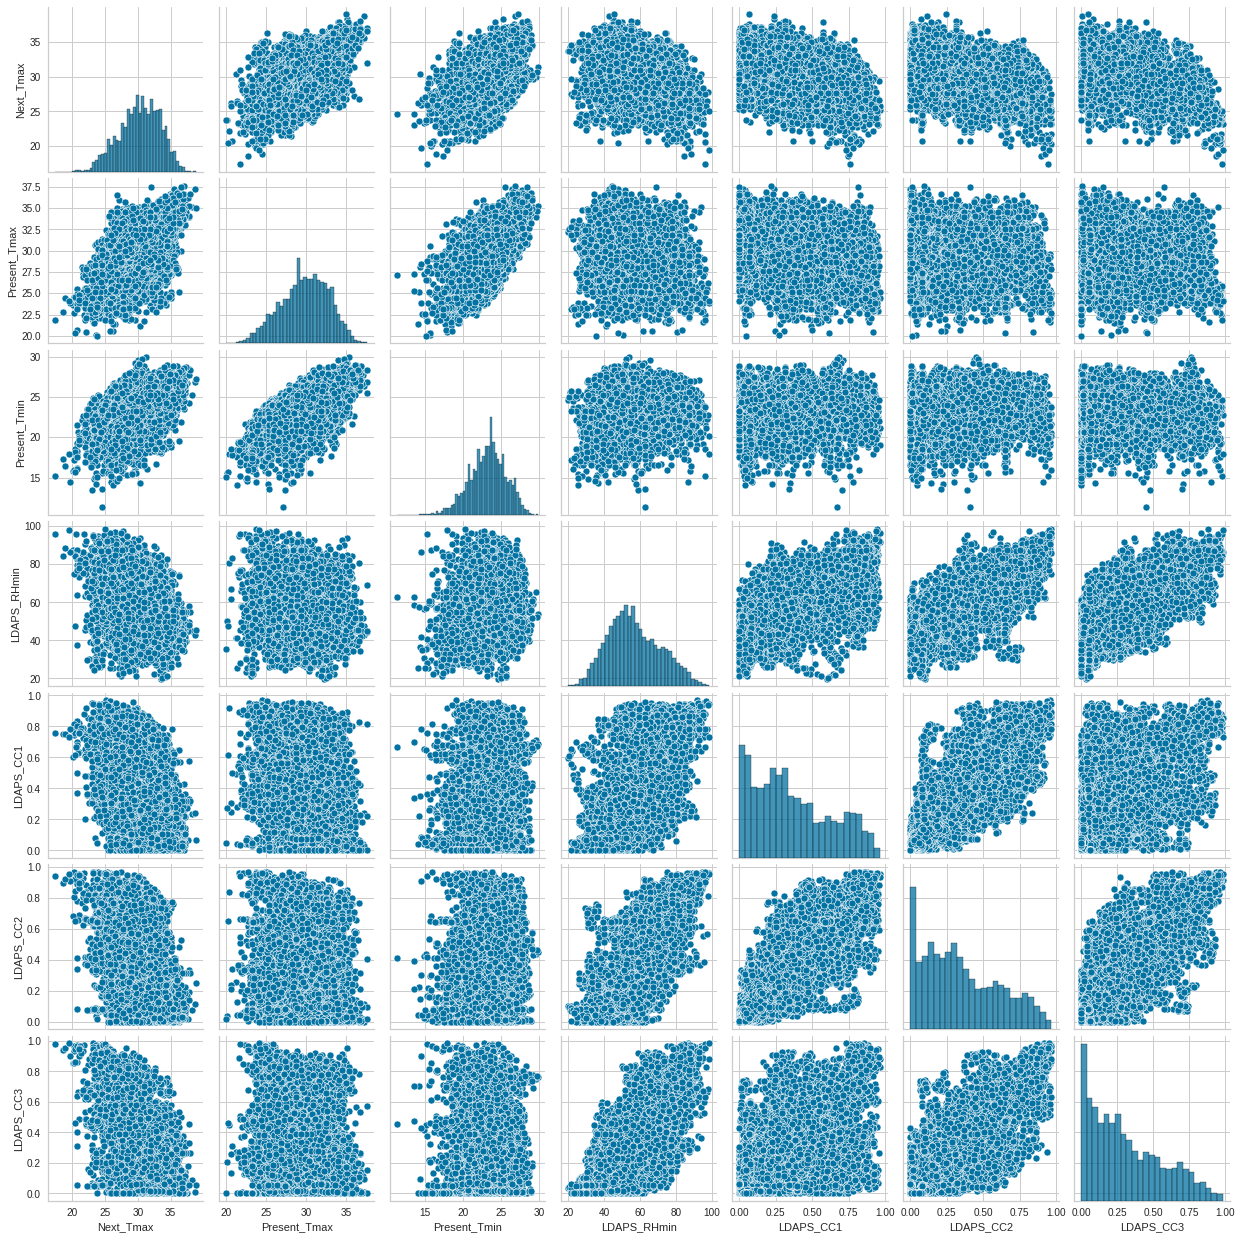

In [206]:
sns.pairplot(df_filtered)